In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Exploratory Data Analysis

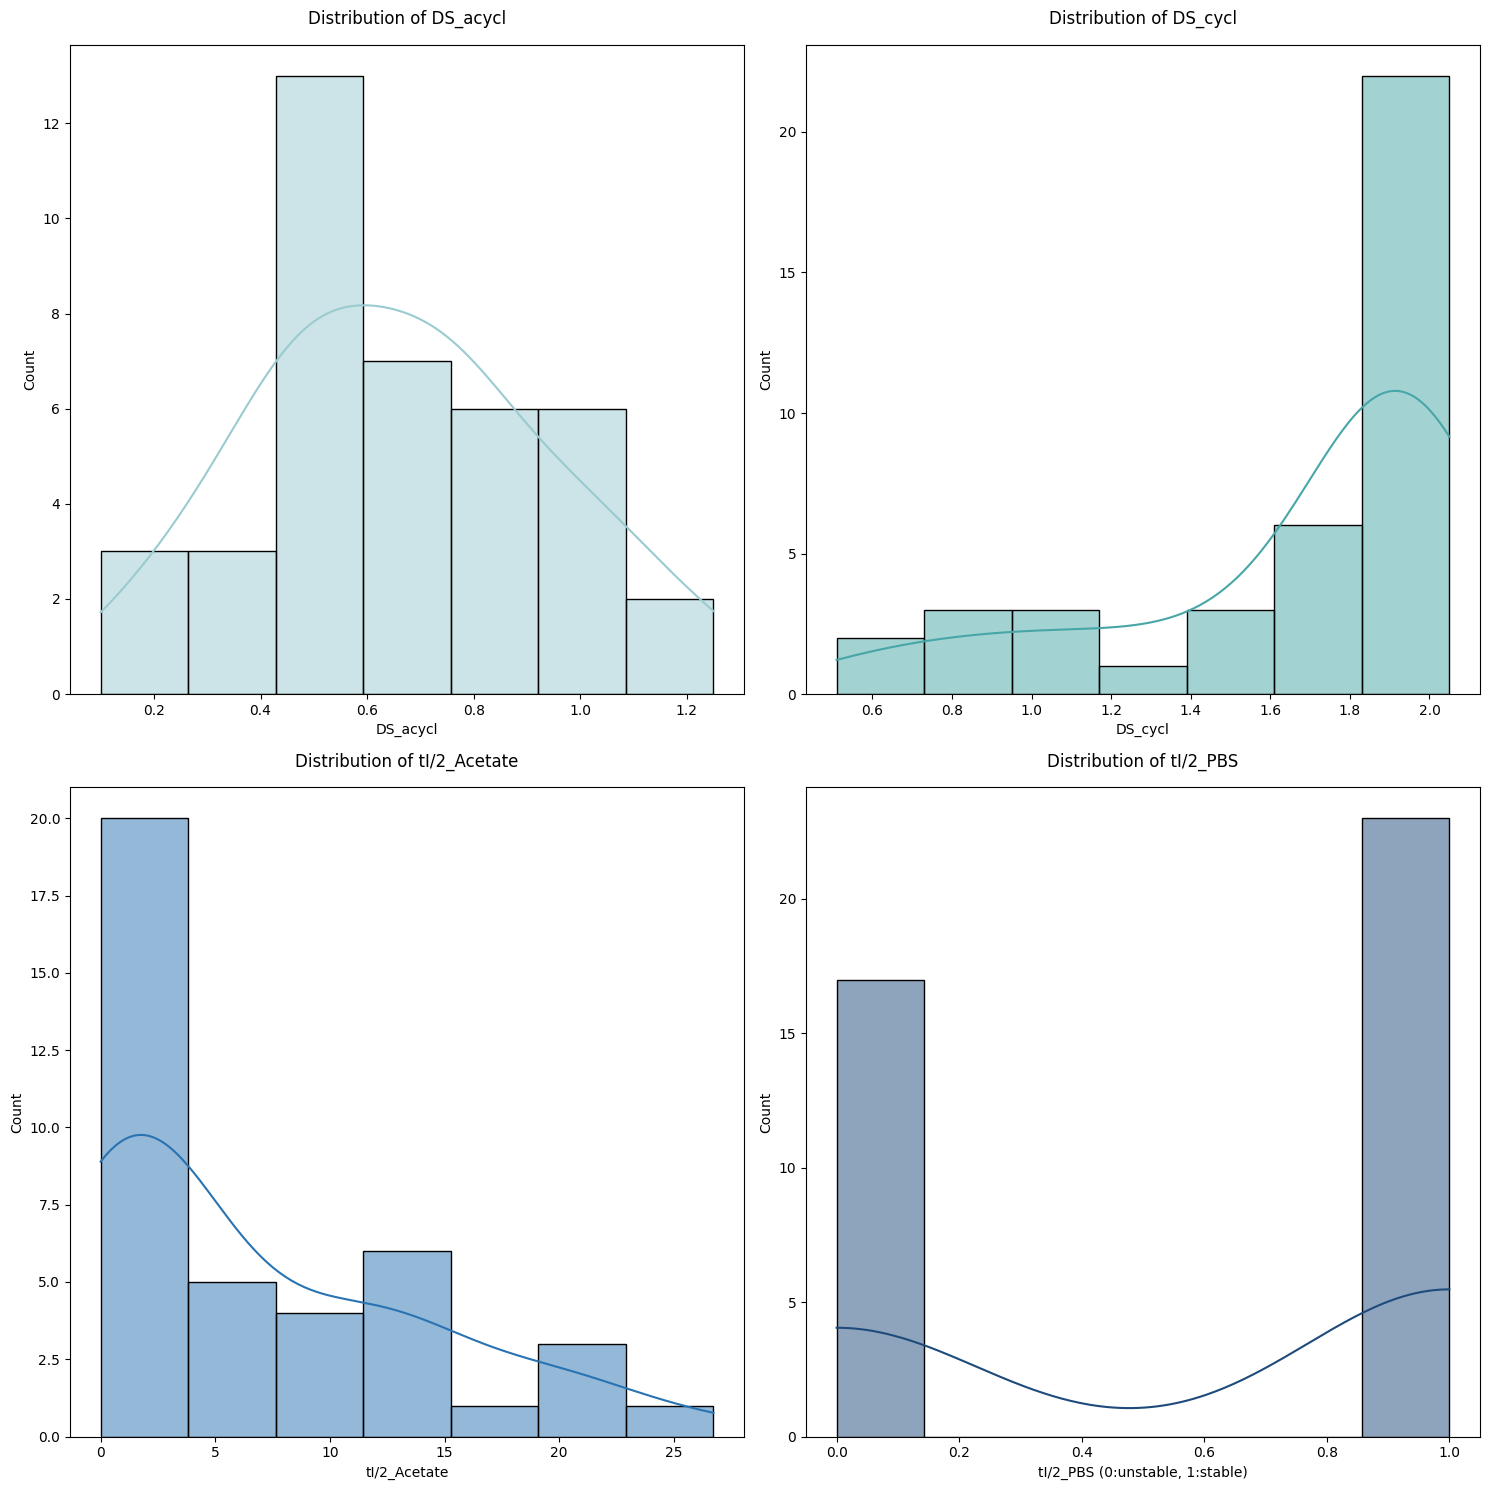

In [3]:
# Load the data
df = pd.read_csv('/home/ta45woj/PolyNanoStabML/data/nano_polymer_stability.csv')

# Convert tI/2_PBS to binary (0 for unstable, 1 for stable)
df['tI/2_PBS'] = (df['tI/2_PBS'] == 'stable').astype(int)

# Drop Rows with Non-Numeric Values in 'tI/2_Acetate' 
df['tI/2_Acetate'] = pd.to_numeric(df['tI/2_Acetate'], errors='coerce')
df = df.dropna(subset=['tI/2_Acetate'])

colors = ['#9ACBD0', '#48A6A7', '#2973B2', '#1E4B7B']

fig, axes = plt.subplots(2, 2, figsize=(15, 15))


sns.histplot(data=df, x='DS_acycl', kde=True, ax=axes[0,0], color=colors[0])
axes[0,0].set_title('Distribution of DS_acycl', fontsize=12, pad=15)
axes[0,0].set_xlabel('DS_acycl', fontsize=10)
axes[0,0].set_ylabel('Count', fontsize=10)

sns.histplot(data=df, x='DS_cycl', kde=True, ax=axes[0,1], color=colors[1])
axes[0,1].set_title('Distribution of DS_cycl', fontsize=12, pad=15)
axes[0,1].set_xlabel('DS_cycl', fontsize=10)
axes[0,1].set_ylabel('Count', fontsize=10)


sns.histplot(data=df, x='tI/2_Acetate', kde=True, ax=axes[1,0], color=colors[2])
axes[1,0].set_title('Distribution of tI/2_Acetate', fontsize=12, pad=15)
axes[1,0].set_xlabel('tI/2_Acetate', fontsize=10)
axes[1,0].set_ylabel('Count', fontsize=10)

sns.histplot(data=df, x='tI/2_PBS', kde=True, ax=axes[1,1], color=colors[3])
axes[1,1].set_title('Distribution of tI/2_PBS', fontsize=12, pad=15)
axes[1,1].set_xlabel('tI/2_PBS (0:unstable, 1:stable)', fontsize=10)
axes[1,1].set_ylabel('Count', fontsize=10)


plt.tight_layout()
plt.show()


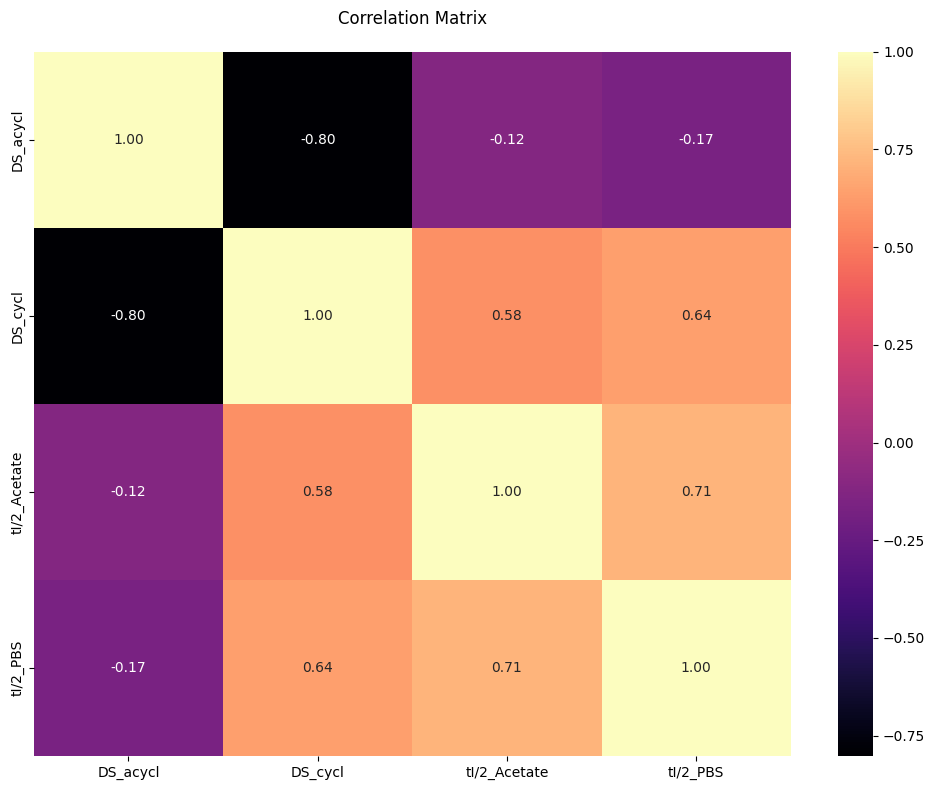


Correlation Matrix:
              DS_acycl   DS_cycl  tI/2_Acetate  tI/2_PBS
DS_acycl      1.000000 -0.802449     -0.123865 -0.165145
DS_cycl      -0.802449  1.000000      0.582281  0.638556
tI/2_Acetate -0.123865  0.582281      1.000000  0.711511
tI/2_PBS     -0.165145  0.638556      0.711511  1.000000


In [4]:
# correlation heat map
corr_matrix = df[['DS_acycl', 'DS_cycl', 'tI/2_Acetate', 'tI/2_PBS']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Matrix', pad=20)
plt.tight_layout()
plt.show()

# Print correlation matrix
print("\nCorrelation Matrix:")
print(corr_matrix)